<a href="https://colab.research.google.com/github/dk-tran92/ML/blob/main/Nhan_dang_mau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bayesian Linear Regression with Pyro
##Install Pyro

In [1]:
!pip install pyro-ppl

     |████████████████████████████████| 713 kB 12.1 MB/s 


##Related Libraries

In [36]:
import time         # We will time our execution often

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Load Database

In [3]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

print(f'Data shape is {X.shape}')
print(f'Target shape is {y.shape}')

Data shape is (442, 10)
Target shape is (442,)


##Data Description
"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n=442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

- 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements
- Response: a quantitative measure of disease progression after 1 year

In [30]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [27]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [5]:
diabetes.target[0]

151.0

In [34]:
features_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
features_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


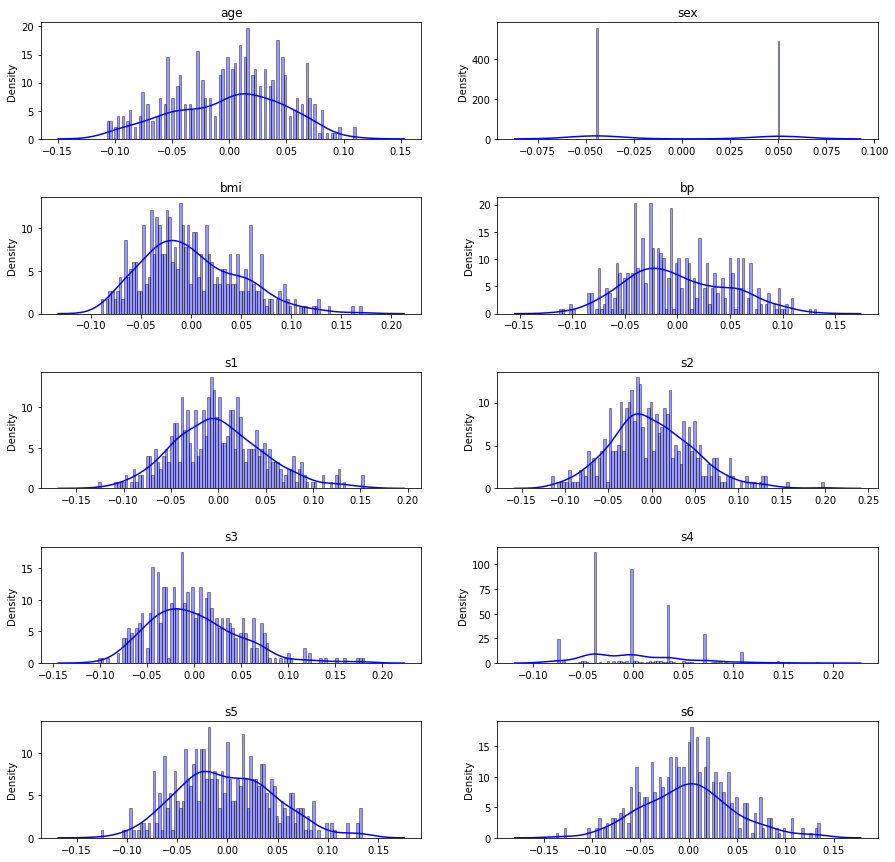

In [37]:
def draw_features(features_df):
    figure, axis = plt.subplots(5,2, figsize=(15,15))


    for key, ax in zip(features_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(features_df[key], 
                     ax=ax, 
                     bins=100, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
draw_features(features_df)

In [58]:
diabetes.data[:,1]*10+0.5

array([1.00680119, 0.05358363, 1.00680119, 0.05358363, 0.05358363,
       0.05358363, 1.00680119, 1.00680119, 1.00680119, 0.05358363,
       0.05358363, 1.00680119, 0.05358363, 1.00680119, 0.05358363,
       1.00680119, 0.05358363, 1.00680119, 0.05358363, 0.05358363,
       0.05358363, 1.00680119, 0.05358363, 1.00680119, 0.05358363,
       1.00680119, 0.05358363, 0.05358363, 0.05358363, 1.00680119,
       0.05358363, 0.05358363, 1.00680119, 0.05358363, 0.05358363,
       1.00680119, 0.05358363, 0.05358363, 1.00680119, 1.00680119,
       1.00680119, 0.05358363, 1.00680119, 0.05358363, 1.00680119,
       1.00680119, 0.05358363, 0.05358363, 1.00680119, 1.00680119,
       0.05358363, 1.00680119, 0.05358363, 0.05358363, 0.05358363,
       0.05358363, 0.05358363, 0.05358363, 0.05358363, 1.00680119,
       0.05358363, 1.00680119, 1.00680119, 0.05358363, 1.00680119,
       1.00680119, 1.00680119, 1.00680119, 1.00680119, 0.05358363,
       0.05358363, 0.05358363, 1.00680119, 1.00680119, 1.00680

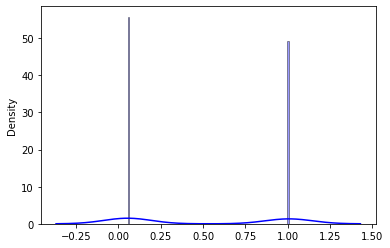

In [59]:
sns.distplot(diabetes.data[:,1]*10+0.5,
              bins=100, 
              color="blue", 
              kde=True, 
              axlabel=False, 
              hist_kws=dict(edgecolor="black"))

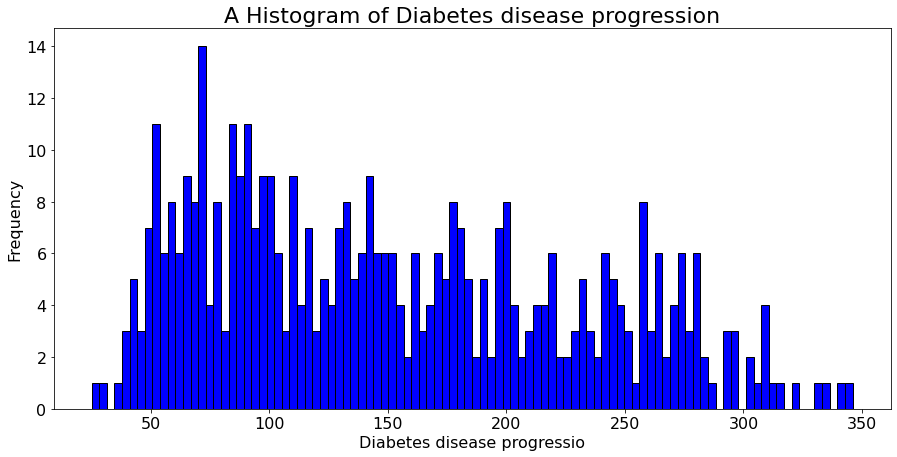

In [6]:
plt.figure(figsize=(15,7))
plt.hist(y, bins=100, color="blue", edgecolor="black")
plt.xlabel("Diabetes disease progressio", size=16)
plt.ylabel("Frequency", size=16)
plt.title("A Histogram of Diabetes disease progression", size=22)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

Ta thấy dạng phân phối của y không phải là phân phối chuẩn mà có vẻ như là một phân phối Gamma (dương và bị lệch)

##Train test split


In [7]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [8]:
# start timing
start_time = time.time()

# fit linear regression
my_linear_regression = LinearRegression().fit(X_train,y_train)
y_pred = my_linear_regression.predict(X_test)

end_time = time.time()

# print point estimates of the coefficients
print(f"beta_intercept: {round(my_linear_regression.intercept_, 2)}")
for i, col in enumerate(diabetes.feature_names):
    print(f"beta_{col}: {round(my_linear_regression.coef_[i], 2)}")

beta_intercept: 151.12
beta_age: -24.21
beta_sex: -197.56
beta_bmi: 571.42
beta_bp: 274.24
beta_s1: -915.29
beta_s2: 602.51
beta_s3: 193.53
beta_s4: 190.34
beta_s5: 788.87
beta_s6: 97.53


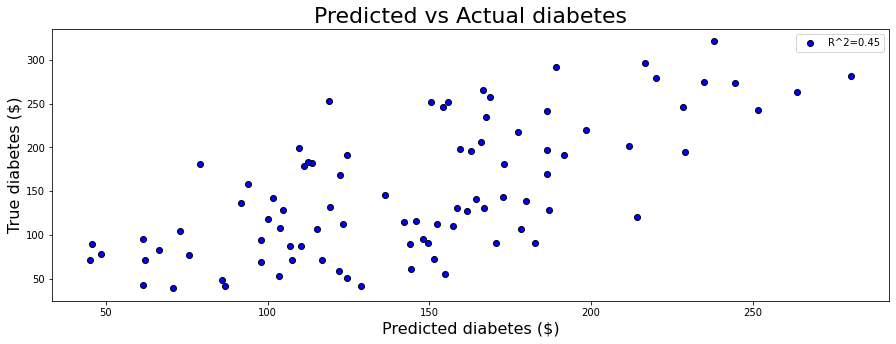

In [9]:
def plot_all_observations(y_true, y_pred, y_max):
    
    y_pred_censored = np.where(y_pred > y_max, y_max, y_pred)
    
    plt.figure(figsize=(15, 5))
    plt.scatter(y_pred_censored, y_test, 
                c="blue", edgecolor="black", 
                label=f'R^2={round(r2_score(y_test, y_pred_censored),2)}')
    
    plt.title("Predicted vs Actual diabetes", size=22)
    plt.xlabel("Predicted diabetes ($)", size=16)
    plt.ylabel("True diabetes ($)", size=16)
    plt.ticklabel_format(style='plain')
    plt.legend()
    
    plt.show()
    
    
    
# Now let's call our function
y_censor_label = y_train.max()
plot_all_observations(y_test, y_pred, y_censor_label)

# Bayesion Linear Regression with Pyro


In [10]:
# import all required Pyro/Pytorch libraries
import torch
torch.set_default_tensor_type(torch.FloatTensor) # set the default to float32

import pyro
import pyro.distributions as dist

# We will use Markov Chain Monte Carlo (MCMC) methods here, specifically the No U-Turn Sampler (NUTS)
from pyro.infer import MCMC, NUTS

In [11]:
def model_normal(X, y, column_names):
    
    # Define our intercept prior
    intercept_prior = dist.Normal(0.0, 1.0)
    linear_combination = pyro.sample(f"beta_intercept", intercept_prior)
    
    
    # Also define coefficient priors
    for i in range(X.shape[1]):
        coefficient_prior = dist.Normal(0.0, 1.0)
        beta_coef = pyro.sample(f"beta_{column_names[i]}", coefficient_prior)
        linear_combination = linear_combination + (X[:, i] * beta_coef)
    
    
    # Define a sigma prior for the random error
    sigma = pyro.sample("sigma", dist.HalfNormal(scale=10.0))
    
    # For a simple linear model, the expected mean is the linear combination of parameters
    mean = linear_combination
    
    
    with pyro.plate("data", y.shape[0]):
        
        # Assume our expected mean comes from a normal distribution with the mean which
        # depends on the linear combination, and a standard deviatin "sigma"
        outcome_dist = dist.Normal(mean, sigma)
        
        # Condition the expected mean on the observed target y
        observation = pyro.sample("obs", outcome_dist, obs=y)

In [12]:
SAMPLE_NUMBER = 353


# Turn out numpy data into PyTorch 
# tensors
X_train_torch = torch.tensor(X_train)
y_train_torch = torch.tensor(y_train)



# Clear the parameter storage
pyro.clear_param_store()

# Initialize our No U-Turn Sampler
my_kernel = NUTS(model_normal, 
                 max_tree_depth=7) # a shallower tree helps the algorithm run faster

# Employ the sampler in an MCMC sampling 
# algorithm, and sample 3100 samples. 
# Then discard the first 100
my_mcmc1 = MCMC(my_kernel,
                num_samples=SAMPLE_NUMBER,
                warmup_steps=53)


# Let's time our execution as well
start_time = time.time()

# Run the sampler
my_mcmc1.run(X_train_torch, 
             y_train_torch,
             diabetes.feature_names)

end_time = time.time()

print()
print(f'Inference ran for {round((end_time -  start_time)/60.0, 2)} minutes')

Sample: 100%|██████████| 406/406 [00:53,  7.57it/s, step size=6.34e-01, acc. prob=0.761]


Inference ran for 0.89 minutes


In [13]:
my_mcmc1.summary()


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
        beta_age      0.08      1.08      0.10     -1.71      1.71    764.02      1.00
        beta_bmi      0.06      1.07      0.03     -1.60      1.89    628.07      1.00
         beta_bp      0.00      0.98      0.05     -1.77      1.44    505.56      1.00
  beta_intercept      2.81      1.10      2.82      1.28      4.89    728.70      1.00
         beta_s1      0.08      1.00      0.06     -1.47      1.73    635.70      1.00
         beta_s2      0.05      1.04      0.01     -1.74      1.56   1058.46      1.00
         beta_s3     -0.04      0.99      0.03     -1.66      1.53    464.92      1.00
         beta_s4      0.08      1.04      0.15     -1.62      1.62    847.49      1.00
         beta_s5      0.06      0.92      0.06     -1.27      1.64    469.82      1.00
         beta_s6      0.05      1.02      0.07     -1.67      1.53    701.42      1.00
        beta_sex     -0.06      1.08     -

In [14]:
beta_df = pd.DataFrame(my_mcmc1.get_samples())
beta_df.head()

,beta_age,beta_bmi,beta_bp,beta_intercept,beta_s1,beta_s2,beta_s3,beta_s4,beta_s5,beta_s6,beta_sex,sigma
0,1.296422,0.074418,0.014116,1.543215,1.010857,-2.255620,1.127484,-2.599872,0.268590,-1.349918,0.240124,136.912946
1,-0.159188,0.038488,0.069908,3.324443,-1.096823,2.346603,-1.012936,1.748425,-1.271815,1.299140,0.321125,133.541355
2,0.424618,-0.258787,0.824988,2.823439,-1.734693,1.026387,0.481096,-0.589343,-1.244483,1.227865,0.747751,140.472465
3,-0.393158,0.360081,-0.876210,2.882695,1.819215,-0.622399,2.160367,0.753177,-0.845532,-1.584228,-0.770059,139.753390
4,-0.085624,-0.807787,-0.863901,1.551200,0.768167,0.290414,-0.281103,-0.130578,-0.228976,0.256404,-0.590904,127.327888


In [15]:
def predict_linear_combination(beta_df, X):
    
    # Don't grab the last column, that is our estimate of the error standard deviation, "sigma"
    coefficients = beta_df.iloc[:, :-1].mean()

    # Find our linear combination again
    linear_combination = X.dot(coefficients[1:]) + coefficients.iloc[0]
    
    return linear_combination

In [16]:
linear_combination = predict_linear_combination(beta_df, X_test)
# Our predictions are the linear combination
y_pred = linear_combination

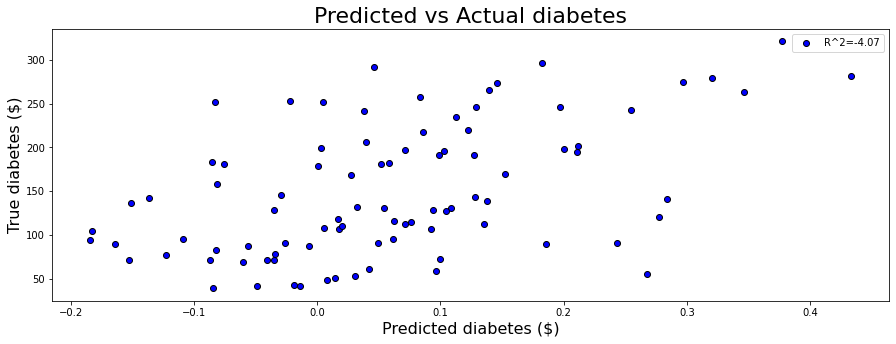

In [17]:
plot_all_observations(y_test, y_pred, y_censor_label)

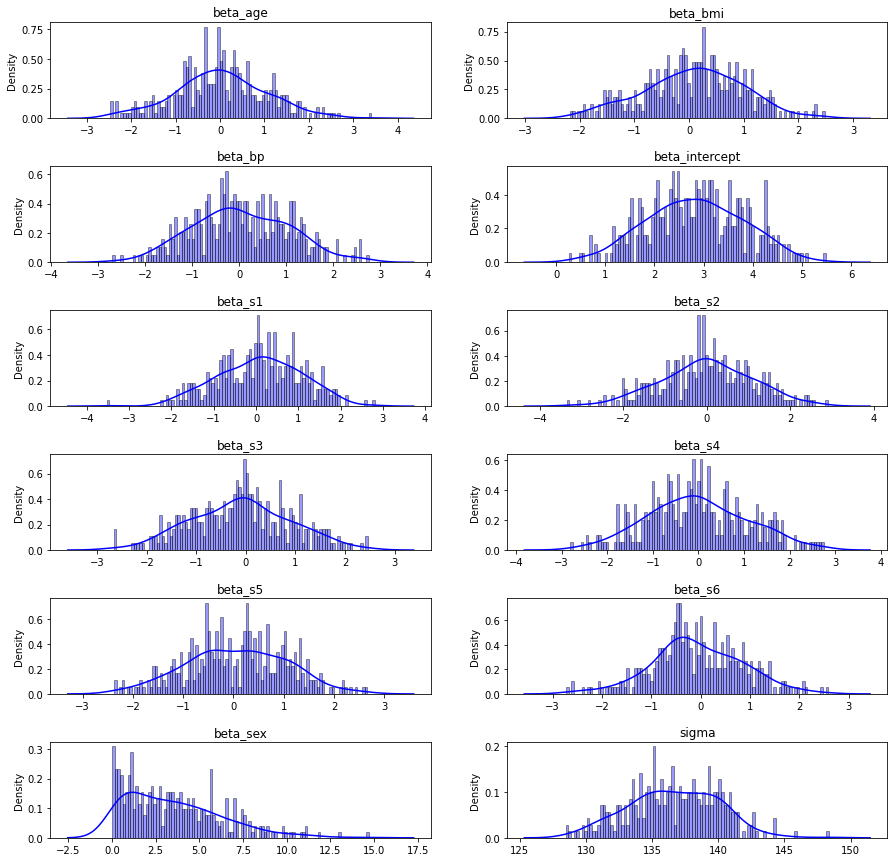

In [52]:
def draw_coefficients(beta_df):
    figure, axis = plt.subplots(6,2, figsize=(15,15))


    for key, ax in zip(beta_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(beta_df[key], 
                     ax=ax, 
                     bins=100, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
draw_coefficients(beta_df)

In [38]:
def model_normal_V(X, y, column_names):
    
    # Define our intercept prior
    intercept_prior = dist.Normal(0.0, 1.0)
    linear_combination = pyro.sample(f"beta_intercept", intercept_prior)
    
    
    # Also define coefficient priors
    for i in range(X.shape[1]):
        if column_names[i] != 'sex':
            coefficient_prior = dist.Normal(0.0, 1.0)
            beta_coef = pyro.sample(f"beta_{column_names[i]}", coefficient_prior)
            linear_combination = linear_combination + (X[:, i] * beta_coef)
        else:
            sex_index = i

    coefficient_sex_prior = dist.Bernoulli(0.5)
    beta_sex_coef = pyro.sample(f"beta_sex", coefficient_sex_prior)
    linear_combination = linear_combination + ((X[:, sex_index]*10+0.5) * beta_sex_coef)


    # Define a sigma prior for the random error
    sigma = pyro.sample("sigma", dist.HalfNormal(scale=10.0))
    
    # For a simple linear model, the expected mean is the linear combination of parameters
    mean = linear_combination
    
    
    with pyro.plate("data", y.shape[0]):
        
        # Assume our expected mean comes from a normal distribution with the mean which
        # depends on the linear combination, and a standard deviatin "sigma"
        outcome_dist = dist.Normal(mean, sigma)
        
        # Condition the expected mean on the observed target y
        observation = pyro.sample("obs", outcome_dist, obs=y)

In [51]:
coefficient_sex_prior = dist.Bernoulli(0.5)
coefficient_sex_prior.sample()

tensor(1.)

In [50]:
coefficient_sex_prior.arg_constraints 

{'logits': Real(), 'probs': Interval(lower_bound=0.0, upper_bound=1.0)}

In [47]:
a = dist.Normal(0.0, 1.0)
a.sample().type()

'torch.FloatTensor'

In [39]:
SAMPLE_NUMBER = 353


# Turn out numpy data into PyTorch 
# tensors
X_train_torch = torch.tensor(X_train)
y_train_torch = torch.tensor(y_train)



# Clear the parameter storage
pyro.clear_param_store()

# Initialize our No U-Turn Sampler
my_kernel2 = NUTS(model_normal_V, 
                 max_tree_depth=7) # a shallower tree helps the algorithm run faster

# Employ the sampler in an MCMC sampling 
# algorithm, and sample 3100 samples. 
# Then discard the first 100
my_mcmc2 = MCMC(my_kernel2,
                num_samples=SAMPLE_NUMBER,
                warmup_steps=53)


# Let's time our execution as well
start_time = time.time()

# Run the sampler
my_mcmc2.run(X_train_torch, 
             y_train_torch,
             diabetes.feature_names)

end_time = time.time()

print()
print(f'Inference ran for {round((end_time -  start_time)/60.0, 2)} minutes')

Warmup:   0%|          | 0/406 [00:00, ?it/s]

RuntimeError: ignored

In [21]:
my_mcmc2.summary()


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
        beta_age      0.02      1.02     -0.03     -1.56      1.77    879.91      1.00
        beta_bmi      0.08      0.90      0.13     -1.45      1.48    429.21      1.00
         beta_bp      0.04      1.02     -0.04     -1.50      1.71    222.90      1.00
  beta_intercept      2.82      0.97      2.86      1.19      4.28    619.75      1.00
         beta_s1      0.09      0.99      0.10     -1.60      1.59    703.94      1.00
         beta_s2     -0.00      1.10     -0.01     -1.72      1.78    547.76      1.00
         beta_s3     -0.10      1.00     -0.07     -1.57      1.64    762.98      1.00
         beta_s4     -0.02      1.09     -0.07     -1.62      1.86    665.44      1.00
         beta_s5      0.06      0.99      0.09     -1.60      1.55    587.30      1.00
         beta_s6     -0.07      0.91     -0.11     -1.50      1.41    222.91      1.00
        beta_sex      3.53      2.75      

In [22]:
beta_df = pd.DataFrame(my_mcmc2.get_samples())
beta_df.head()

,beta_age,beta_bmi,beta_bp,beta_intercept,beta_s1,beta_s2,beta_s3,beta_s4,beta_s5,beta_s6,beta_sex,sigma
0,-1.014527,-0.397236,-0.044443,3.275669,1.275376,-0.012274,1.260980,-0.589554,1.962154,2.071199,4.095416,132.127681
1,0.130904,-1.659349,0.923933,2.861192,-1.030148,1.556845,-0.787464,1.832498,0.680684,-0.382046,5.197471,141.137904
2,-0.430018,0.016538,1.486629,2.666329,0.742019,-0.212812,0.325198,-0.827118,-1.072882,0.183248,1.255270,131.736163
3,0.437194,-0.714486,1.175517,3.850021,-1.970321,0.581215,-0.523072,0.628784,0.863532,0.862324,6.167139,139.328943
4,-0.156057,-0.102283,0.652276,2.182066,1.190077,1.033357,0.232905,-0.596994,-0.357312,-1.497570,3.097959,138.030508


In [23]:
def predict_linear_combination(beta_df, X):
    
    # Don't grab the last column, that is our estimate of the error standard deviation, "sigma"
    coefficients = beta_df.iloc[:, :-1].mean()

    # Find our linear combination again
    linear_combination = X.dot(coefficients[1:]) + coefficients.iloc[0]
    
    return linear_combination

In [24]:
linear_combination = predict_linear_combination(beta_df, X_test)
# Our predictions are the linear combination
y_pred = linear_combination

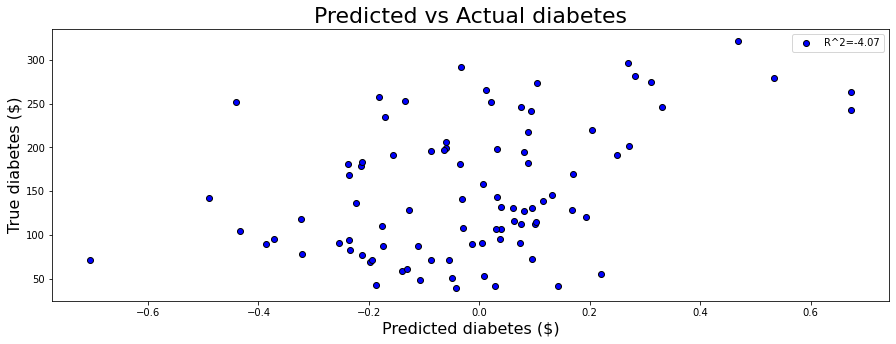

In [25]:
plot_all_observations(y_test, y_pred, y_censor_label)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

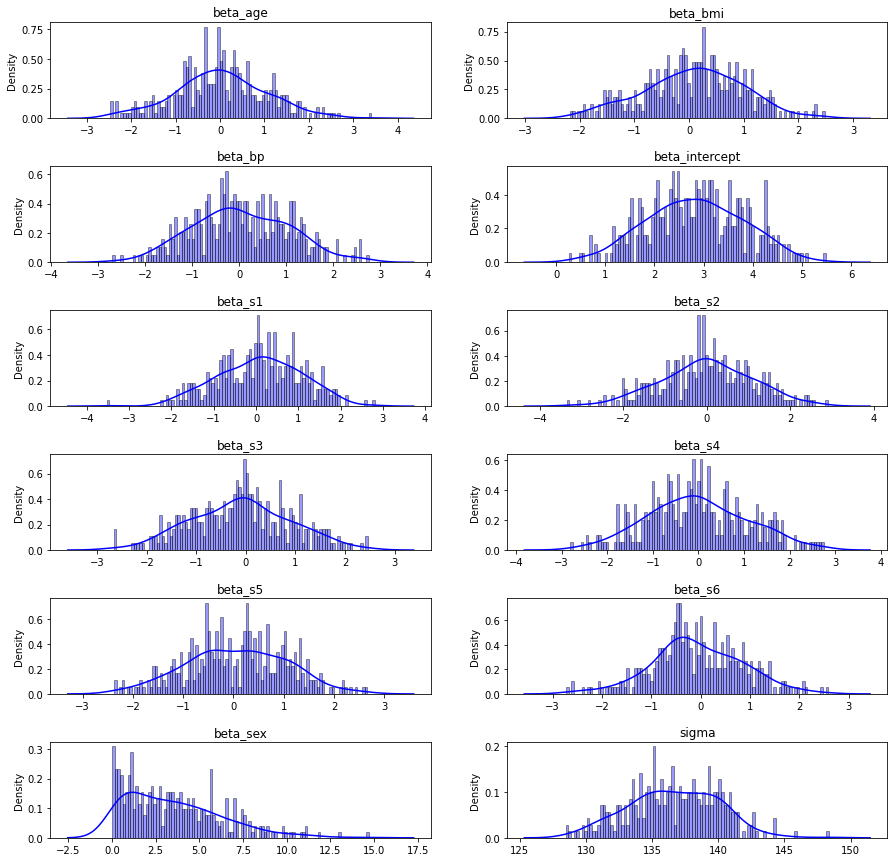

In [26]:
def draw_coefficients(beta_df):
    figure, axis = plt.subplots(6,2, figsize=(15,15))


    for key, ax in zip(beta_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(beta_df[key], 
                     ax=ax, 
                     bins=100, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
draw_coefficients(beta_df)